In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Linear Regression

In this lab, we are going to implement a Linear Regression model "by hand" and also use sklearn to implement linear regressors using different basis functions, and then add regularization to the models.



## Part 1 - Synthetic and real datasets

* Generate 50 points in a line in the interval $[0, 10]$ for `x`, perturbed by a small gaussian noise. For example, `y = 2 * x + 5 + noise` where `noise` is taken from a normal distribution.
* plot the generated data as a scatter plot, and the line without noise as a reference

*Note:* If you want to generate the same data as I generated, use $y = 3x + 5 + \epsilon$ after setting the random seed to 0

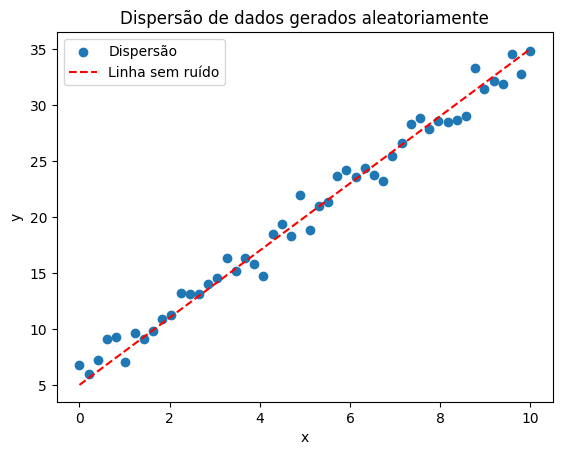

In [159]:
# Vamos definir o estado inicial do gerador de números aleatórios
np.random.seed(0)

# Criaremos um vetor de 50 elementos no intervalo [0, 10] 
x = np.linspace(0, 10, 50)

# Criando o ruído a partir de uma distribuição normal
ruido = np.random.normal(scale=1.0, size=x.shape)

# Criando valores de y usando a equação y = 3x + 5 + ruido
y = 3 * x + 5 + ruido

#GRÁFICO

# Criando um gráfico de dispersão para os pontos gerados anteriormente
plt.scatter(x, y, label='Dispersão')

# Criando a linha sem ruído para ter com o que comparar
plt.plot(x, 3 * x + 5, color='red', linestyle='--', label='Linha sem ruído')

# Colocando legenda no eixo x
plt.xlabel('x')

# Colocando legenda no eixo y
plt.ylabel('y')

# Colocando título no gráfico
plt.title('Dispersão de dados gerados aleatoriamente')

# Colocando legenda no gráfico 
plt.legend()

# Exibindo o gráfico
plt.show()



### Load the housing dataset

For this lab we will be using the raw version of the Housing dataset that you used for the first coursework.

**Housing.txt:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

In [160]:
housing = pd.read_table("housing.csv", sep=',')
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165,3.135494


## Part 2 -- Build Linear Regression Models

You will need to implement it twice:

1. using the Normal Equations seen in class (Moore-Penrose pseudo-inverse)
2. using stochastic gradient descent

* **Tip 1:** When you implement the stochastic gradient version it will be crucial to plot the sum of squares error as a function of the iteration
* **Tip 2:** You will need to initialize the weights. Start by choosing them randomly, Gaussian distributed, with a very small variance...

Run some experiments with your stochastic gradient descent version, and think about these questions: 
* what happens with different values of the step parameter? 
* Does the system always converge to the same solution? 
* Are you getting the same solution that you get with the closed form implementation? 
* What happens if you initialize your weights to values that are too big?

Below, I provide some skeletons for your implementations, but feel free to structure your code differently.

Remember to:
* Separate the datasets into training and testing (I used 60% for training)


In [161]:
def linear_regression_PI(X, y):
    """
    Implements a Linear Regression model using the Moore-Penrose pseudo-inverse
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    
    Returns
    -------
    w : array
        Learnt parameters
        
    Notes
    -----
    The first column of w corresponds to the bias (`w_0`)
    """
    # Adicionando uma coluna de 1s para representar o termo de viés
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Calculando a pseudo-inversa de Moore-Penrose de X_b
    X_b_pseudo_inv = np.linalg.pinv(X_b)
    
    # Calculando os parâmetros aprendidos
    w = np.dot(X_b_pseudo_inv, y)
    
    return w

def linear_regression_SGD(X, y, lr, max_iter=10):
    """
    Implements a Linear Regression model using Stochastic Gradient Descent
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    lr : float
        Learning rate
    max_iter : int
        number of epochs to use for the gradient descent
    
    Returns
    -------
    w : array
        Learnt parameters
    sse_history : array
        An array that contains the error of the model in every iteration
    """
    
    # Vamos definir o estado inicial do gerador de números aleatórios
    np.random.seed(0)

    # Definindo w
    w = np.random.randn(X.shape[1] + 1) * 0.01  
    
    # Adicionando uma coluna de 1s para representar o termo de viés
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Criando uma lista para armazenar o histórico de erro
    sse_history = []
    
    # Loop através das épocas
    for epoch in range(max_iter):
        sse = 0  
        
        # Loop através de cada amostra
        for i in range(X_b.shape[0]):
            # Calculando a previsão
            y_pred = np.dot(X_b[i], w)
            
            # Calculando o erro
            error = y[i] - y_pred
            
            # Atualizando os parâmetros usando o gradiente descendente
            w += lr * error * X_b[i]
            
            # Atualizando o SSE
            sse += error ** 2
        
        # Calculando o erro médio para esta época e adicionando ao histórico
        sse_history.append(sse / X_b.shape[0])
    
    return w, sse_history
   


we can now use this function to learn the parameters for predicting `NOX`

First you will have to prepare the data:
- Separate the features from the target variables (Put the features in a matrix X and the target variable in a vector y)
- Split the data using sklearn's train_test_split.

In [162]:
# Aqui temos que separar as características (X) da variável alvo (y)

# Características excluindo NOX
X = housing.drop("NOX", axis=1)  

# Colocando a variável alvo NOX como y
y = housing["NOX"]  

# Dividiremos os dados em conjuntos de treinamento e teste (60% treinamento, 40% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Convertendo os dados em X_train para arrays numpy
X_train = X_train.to_numpy()

# Convertendo os dados em y_train para arrays numpy
y_train = y_train.to_numpy()

# Treinando os modelos
w_normal_eq = linear_regression_PI(X_train, y_train)
w_sgd, sse_history = linear_regression_SGD(X_train, y_train, lr=0.001, max_iter=100)

# Avaliando os modelos
def calcular_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_normal_eq = np.dot(X_test_b, w_normal_eq)
y_pred_sgd = np.dot(X_test_b, w_sgd)

rmse_normal_eq = calcular_rmse(y_test, y_pred_normal_eq)
rmse_sgd = calcular_rmse(y_test, y_pred_sgd)

print("RMSE usando Equações Normais:", rmse_normal_eq)
print("RMSE usando Descida de Gradiente Estocástico:", rmse_sgd)


RMSE usando Equações Normais: 0.07562672016265332
RMSE usando Descida de Gradiente Estocástico: 0.08428595902050862


Now use the functions you coded to learn the weights!

In [163]:
# Aplicando regressão linear usando pseudo-inversa de Moore-Penrose
w_PI = linear_regression_PI(X_train, y_train)
print("Pesos usando pseudo-inversa:", w_PI)

# Aplicando regressão linear usando Descida de Gradiente Estocástica
lr = 0.01
max_iter = 100
w_SGD, sse_history = linear_regression_SGD(X_train, y_train, lr, max_iter)
print("Pesos usando SGD:", w_SGD)


Pesos usando pseudo-inversa: [ 0.46623814 -0.21770323 -0.04328764  0.14976596  0.01210185  0.03568094
  0.15485067 -0.44657556  0.15095904  0.06690766 -0.2083887   0.02567277
  0.01839287 -0.07022061]
Pesos usando SGD: [ 0.17531376 -0.0363044  -0.0547362   0.17610304 -0.00391896  0.0577982
  0.19461704 -0.31931986  0.1113624   0.09581404 -0.17937607  0.01870216
  0.13146881 -0.00835909]


make a plot that shows the evolution of the sum of squares error

**tip:** make it a callable function that you can reuse for the next task

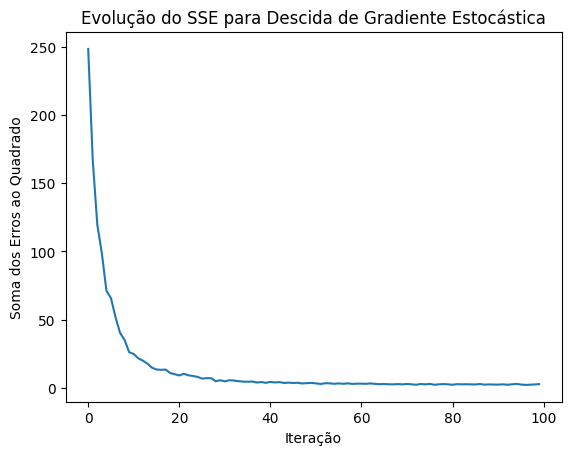

In [164]:
# Função para regressão linear usando Descida de Gradiente Estocástica
def linear_regression_SGD(X_train, y_train, lr, max_iter=10):
    """
    Implementa um modelo de Regressão Linear usando Descida de Gradiente Estocástica
    
    Parâmetros
    ----------
    X_train : array
        Um array 2-dimensional com amostras nas linhas e características nas colunas para o conjunto de treinamento
    y_train : array
        Um array com o mesmo número de amostras que em X_train, os valores a serem previstos para o conjunto de treinamento
    lr : float
        Taxa de aprendizado
    max_iter : int
        Número de épocas a serem usadas para a descida de gradiente
    
    Retorna
    -------
    w : array
        Parâmetros aprendidos
    sse_history : array
        Um array que contém o erro do modelo em cada iteração
        
    Notas
    -----
    Esta função usa o gradiente da função de soma dos quadrados (Equações 3.12 e 3.23 no livro do Bishop)
    """
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Adiciona o termo de viés
    w = np.random.randn(X_b.shape[1])  # Inicializa os pesos aleatoriamente
    sse_history = []  # Armazena o histórico de SSE para plotagem
    
    for epoch in range(max_iter):
        sse = 0
        for i in range(X_b.shape[0]):
            random_index = np.random.randint(X_b.shape[0])
            xi = X_b[random_index:random_index+1]
            yi = y_train[random_index:random_index+1]
            error = xi.dot(w) - yi
            gradient = xi.T.dot(error)
            w -= lr * gradient
            sse += np.sum(error**2)
        sse_history.append(sse)
    
    return w, sse_history

def plot_sse_evolution(sse_history):
    """
    Plota a evolução do erro de soma dos quadrados (SSE) ao longo das iterações da Descida de Gradiente Estocástica.
    
    Parâmetros
    ----------
    sse_history : array
        Um array que contém o erro do modelo em cada iteração
    
    Retorna
    -------
    None
    """
    plt.plot(range(len(sse_history)), sse_history)
    plt.xlabel('Iteração')
    plt.ylabel('Soma dos Erros ao Quadrado')
    plt.title('Evolução do SSE para Descida de Gradiente Estocástica')
    plt.show()

# Separando as features (X) da variável alvo (y)
X = housing.drop(columns=['NOX']).values  # Features
y = housing['NOX'].values  # Variável alvo

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando regressão linear usando Descida de Gradiente Estocástica
lr = 0.01
max_iter = 100
w_SGD, sse_history = linear_regression_SGD(X_train, y_train, lr, max_iter)

# Plotando a evolução do SSE
plot_sse_evolution(sse_history)


Use the learn weights to make predictions for the test set, and evaluate the model using the root mean squared error (remember that the bias is the first column of the weight matrix)
- You can use the function you coded for your coursework, but feel free to use sklearn's `mean_squared_error()` here

In [165]:
def rmse(y_true, y_pred):
    # Calculando os resíduos
    residuals = y_true - y_pred
    
    # Elevando ao quadrado cada resíduo
    squared_residuals = residuals ** 2
    
    # Calculando a média dos resíduos quadrados
    mean_squared_residuals = np.mean(squared_residuals)
    
    # Tirando a raiz quadrada da média dos resíduos quadrados para obter o RMSE
    rmse_value = np.sqrt(mean_squared_residuals)
    
    return rmse_value

# Aplica regressão linear usando Descida de Gradiente Estocástica
lr = 0.01
max_iter = 100
w_SGD, sse_history = linear_regression_SGD(X_train, y_train, lr, max_iter)

# Adiciona o termo de viés para os dados de teste
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Faz as previsões para os dados de teste
y_pred = X_test_b.dot(w_SGD)

# Calcula o RMSE
rmse_score = rmse(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse_score)


Root Mean Squared Error (RMSE): 0.08325313808512613


Repeat the same analysis for predicting `MEDV`

In [166]:
# Separando as features (X) da variável alvo (y)
X = housing.drop(columns=['MEDV']).values  # Features
y = housing['MEDV'].values  # Variável alvo

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando regressão linear usando Descida de Gradiente Estocástica
lr = 0.01
max_iter = 100
w_SGD, sse_history = linear_regression_SGD(X_train, y_train, lr, max_iter)

# Adicionando o termo de viés para os dados de teste
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Fazendo as previsões para os dados de teste
y_pred = X_test_b.dot(w_SGD)

# Calculando o RMSE
rmse_score = rmse(y_test, y_pred)
print("Root Mean Squared Error (RMSE) for predicting MEDV:", rmse_score)


Root Mean Squared Error (RMSE) for predicting MEDV: 0.2001982997157304


## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



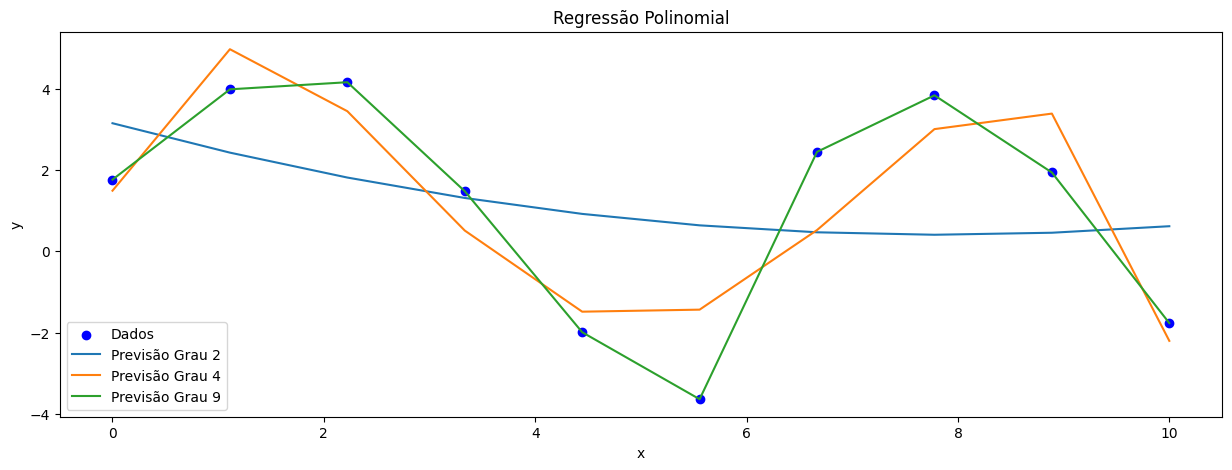

In [167]:
# Vamos definir o estado inicial do gerador de números aleatórios
np.random.seed(0)

# Criaremos um vetor de 50 elementos no intervalo [0, 10] para ser o x
x = np.linspace(0, 10, 10)

# Criando y a partir de x
y = 4 * np.sin(x) + np.random.normal(0, 1, size=x.shape[0])

# Definindo a função de base polinomial manualmente
def base_polinomial_manual(x, grau):
    Phi = np.zeros((len(x), grau + 1))
    for i in range(grau + 1):
        Phi[:, i] = x ** i
    return Phi

# Transformando x em matrizes de design para graus 2, 4 e 9
graus = [2, 4, 9]
matrizes_design = [base_polinomial_manual(x, grau) for grau in graus]

# Ajustando modelos de regressão para cada grau
modelos = []
for grau, Phi in zip(graus, matrizes_design):
    modelo = LinearRegression().fit(Phi, y)
    modelos.append(modelo)

#GRÁFICO 
    
# Criando uma figura com tamanho definido
plt.figure(figsize=(15, 5))

# Criando um gráfico de dispersão dos dados escolhidos anteriormente
plt.scatter(x, y, color='blue', label='Dados')  

# Para cada grau e modelo no conjunto de graus e modelos
for grau, modelo in zip(graus, modelos):
    # Calcularemos as características polinomiais usando a função base_polinomial_manual
    Phi = base_polinomial_manual(x, grau)
    
    # Fazeremos previsões usando o modelo
    y_pred = modelo.predict(Phi)
    
    # Plotaremos as previsões como uma linha, rotulada com o grau do polinômio
    plt.plot(x, y_pred, label=f'Previsão Grau {grau}')

# Colocando título no gráfico
plt.title('Regressão Polinomial')

# Colocando legenda no eixo x
plt.xlabel('x')

# Colocando legenda no eixo x y
plt.ylabel('y')

# Colocando legenda no gráfico 
plt.legend()

# Exibir o gráfico
plt.show()



## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

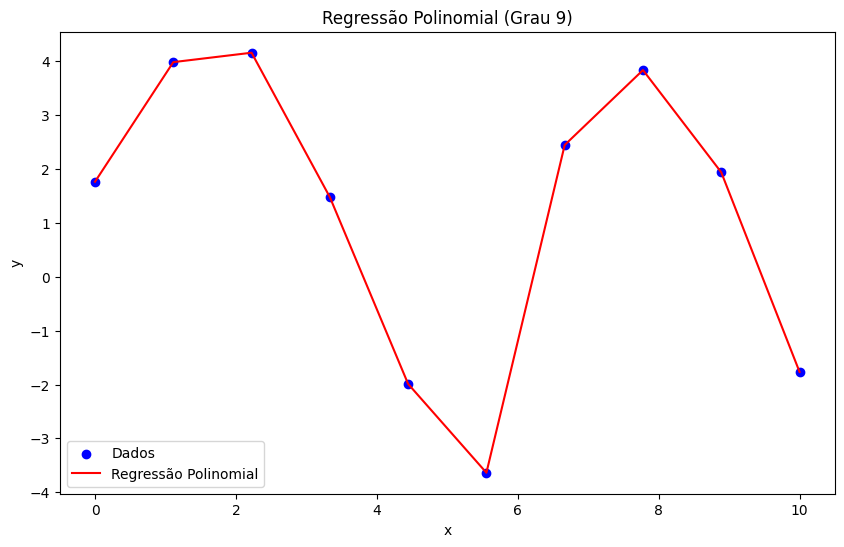

In [168]:
# Vamos definir o estado inicial do gerador de números aleatórios
np.random.seed(0)

# Criaremos um vetor de 50 elementos no intervalo [0, 10] para ser o x
x = np.linspace(0, 10, 10)

# Criando y a partir de x
y = 4 * np.sin(x) + np.random.normal(0, 1, size=x.shape[0])

# Redimensionando x para um vetor de coluna
x = x.reshape(-1, 1)

# Definindo o grau do polinômio
grau = 9

# Criando features polinomiais
poly = PolynomialFeatures(degree=grau)
X_poly = poly.fit_transform(x)

# Ajustando o modelo de regressão linear
modelo = LinearRegression().fit(X_poly, y)

# Previsões
y_pred = modelo.predict(X_poly)

# GRÁFICO

# Criando uma figura com tamanho definido
plt.figure(figsize=(10, 6))

# Criando um gráfico de dispersão dos dados escolhidos anteriormente
plt.scatter(x, y, color='blue', label='Dados')

# Adicionando a linha da regressão polinomial 
plt.plot(x, y_pred, color='red', label='Regressão Polinomial')

# Colocando título no gráfico 
plt.title(f'Regressão Polinomial (Grau {grau})')

# Colocando legenda no eixo x
plt.xlabel('x')

# Colocando legenda no eixo y
plt.ylabel('y')

# Colocando legenda no gráfico 
plt.legend()

# Exibindo o gráfico
plt.show()
